In [2]:
from __future__ import print_function
# 使用本地的abu
import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))

import abupy
from abupy import six, xrange, range, reduce, map, filter, partial
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [3]:
print(sys.version)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]


# 第2章 量化语言-Python
## 2.1　基础语法与数据结构
[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

### 1．基本类型

In [4]:
price_str = '30.14, 29.58, 26.36, 32.56, 32.82'

In [5]:
type(price_str)

str

### 2.基本语法
判断price_str是否为int和float类型，因为price_str是str类型，所以将最终走到else通过raise TypeError抛出一个异常来明确问题

In [6]:
if not isinstance(price_str, str):
    # not代表逻辑‘非’， 如果不是字符串，转换为字符串
    price_str = str(price_str)
if isinstance(price_str, int) and price_str > 0:
    # and 代表逻辑‘与’，如果是int类型且是正数
    price_str += 1
elif isinstance(price_str, float) or float(price_str[:4]) < 0:
    # or 代表逻辑‘或’，如果是float或者小于0
    price_str += 1.0
else:
    try:
        raise TypeError('price_str is str type!')
    except TypeError:
        print('raise, try except')

raise, try except


## 2.1.2 字符串和容器
### 1.字符串

In [7]:
print('旧的price_str id= {}'.format(id(price_str)))
price_str = price_str.replace(' ', '')
print('新的price_str id= {}'.format(id(price_str)))
price_str

旧的price_str id= 2109551675944
新的price_str id= 2109553289856


'30.14,29.58,26.36,32.56,32.82'

### 2.容器
列表是一种有序的容器，可以对元素进行增、删、改操作

In [8]:

# split以逗号分割字符串，返回数组price_array
price_array = price_str.split(',')
print(price_array)
# price_array尾部append一个重复的32.82
price_array.append('32.82')
print(price_array)

['30.14', '29.58', '26.36', '32.56', '32.82']
['30.14', '29.58', '26.36', '32.56', '32.82', '32.82']


In [9]:
set(price_array)

{'26.36', '29.58', '30.14', '32.56', '32.82'}

In [10]:
price_array.remove('32.82')
price_array

['30.14', '29.58', '26.36', '32.56', '32.82']

In [11]:
len(price_array)

5

### 3.循环控制
首先创建一个数组，里面对应着每个收盘价格的交易日期,使用for循环实现

In [12]:
date_array = []
date_base = 20170118
# 这里用for只是为了计数，无用的变量python建议使用'_'声明
for _ in xrange(0, len(price_array)):
    # 本节只是简单示例，不考虑日期的进位
    date_array.append(str(date_base))
    date_base += 1
date_array

['20170118', '20170119', '20170120', '20170121', '20170122']

In [13]:
date_array = []
date_base = 20170118
price_cnt = len(price_array) - 1
while price_cnt > 0:
    date_array.append(str(date_base))
    date_base += 1
    price_cnt -= 1
date_array

['20170118', '20170119', '20170120', '20170121']

In [14]:
list(enumerate(price_array))

[(0, '30.14'), (1, '29.58'), (2, '26.36'), (3, '32.56'), (4, '32.82')]

### 4.列表推导式
使用列表推导式来完成

In [15]:
date_base = 20170118
date_array = [str(date_base + ind) for ind, _ in enumerate(price_array)]
date_array

['20170118', '20170119', '20170120', '20170121', '20170122']

In [16]:
stock_tuple_list = [(date, price) for date, price in zip(date_array, price_array)]
# tuple访问使用索引
print('20170119日价格：{}'.format(stock_tuple_list[1][1]))
stock_tuple_list

20170119日价格：29.58


[('20170118', '30.14'),
 ('20170119', '29.58'),
 ('20170120', '26.36'),
 ('20170121', '32.56'),
 ('20170122', '32.82')]

### 5.可命名元组：namedtuple

In [17]:
from collections import namedtuple

stock_namedtuple = namedtuple('stock', ('date', 'price'))
stock_namedtuple_list = [stock_namedtuple(date, price) for date, price in zip(date_array, price_array)]
# namedtuple访问使用price
print('20170119日价格：{}'.format(stock_namedtuple_list[1].price))
stock_namedtuple_list

20170119日价格：29.58


[stock(date='20170118', price='30.14'),
 stock(date='20170119', price='29.58'),
 stock(date='20170120', price='26.36'),
 stock(date='20170121', price='32.56'),
 stock(date='20170122', price='32.82')]

### 6.字典推导式

In [18]:
# 字典推导式：{key: value for in}
stock_dict = {date:price for date, price in zip(date_array, price_array)}
print('20170119日价格：{}'.format(stock_dict['20170119']))
stock_dict

20170119日价格：29.58


{'20170118': '30.14',
 '20170119': '29.58',
 '20170120': '26.36',
 '20170121': '32.56',
 '20170122': '32.82'}

In [19]:
stock_dict.keys(), stock_dict.values()

(dict_keys(['20170118', '20170119', '20170120', '20170121', '20170122']),
 dict_values(['30.14', '29.58', '26.36', '32.56', '32.82']))

### 7.有序字典：Ordered Dict

In [20]:
from collections import OrderedDict
stock_dict = OrderedDict((date, price) for date, price in zip(date_array, price_array))
stock_dict.keys()

odict_keys(['20170118', '20170119', '20170120', '20170121', '20170122'])

如上所示使用OrderedDict构造的dict返回的keys是按照插入顺序返回的

## 2.2 函数

### 2.2.1 函数的使用和定义
#### 1.内置函数

In [21]:
min(stock_dict)

'20170118'

In [22]:
min(zip(stock_dict.values(), stock_dict.keys()))

('26.36', '20170120')

#### 2.自定义函数

In [23]:
def find_second_max(dict_array):
    # 对传入的dict sorted排序
    stock_prices_sorted = sorted(zip(dict_array.values(), dict_array.keys()))
    # 第二大的也就是倒数第二个
    return stock_prices_sorted[-2]

# 系统函数callable验证是否为一个可call的函数
if callable(find_second_max):
    print(find_second_max(stock_dict))

('32.56', '20170121')


### 2.2.2 lambda函数

In [24]:
find_second_max_lambda = lambda dict_array: sorted(zip(dict_array.values(), dict_array.keys()))[-2]
find_second_max_lambda(stock_dict)

('32.56', '20170121')

In [25]:
def find_max_and_min(dict_array):
    # 对传入的dict sorted排序
    stock_prices_sorted = sorted(zip(dict_array.values(), dict_array.keys()))
    return stock_prices_sorted[0], stock_prices_sorted[-1]

find_max_and_min(stock_dict)

(('26.36', '20170120'), ('32.82', '20170122'))

### 2.2.3 高阶函数

#### 从收盘价格，推导出每天的涨跌幅度
首先将两两相邻的收盘价格组成tupe后装入ls

In [26]:
# 将字符串的的价格通过列表推导式显示转换为float类型
# 由于stock_dict是OrderedDict所以才可以直接
# 使用stock_dict.values()获取有序日期的收盘价格
price_float_array = [float(price_str) for price_str in stock_dict.values()]
# 通过将时间平移形成两个错开的收盘价序列，通过zip打包成为一个新的序列，
# 通过[:-1]:从第0个到倒数第二个，[1:]：从第一个到最后一个 错开形成相邻
# 组成的序列每个元素为相邻的两个收盘价格
pp_array = [(price1, price2) for price1, price2 in zip(price_float_array[:-1], price_float_array[1:])]
pp_array

[(30.14, 29.58), (29.58, 26.36), (26.36, 32.56), (32.56, 32.82)]

推导出每天的涨跌幅度。

In [27]:
# list(map) 配合 six.moves.map for python3
change_array = list(map(lambda pp: reduce(lambda a, b: round((b - a) / a, 3), pp), pp_array))
# list insert插入数据，将第一天的涨跌幅设置为0
change_array.insert(0, 0)
change_array

[0, -0.019, -0.109, 0.235, 0.008]

将计算出的涨跌幅数据加入 Ordered Dict，配合使用 namedtuple重新构建数据结构 stock dict

In [28]:
# 使用namedtuple重新构建数据结构
stock_namedtuple = namedtuple('stock', ('date', 'price', 'change'))
# 通过zip分别从date_array，price_array，change_array拿数据组成
# stock_namedtuple然后以date做为key组成OrderedDict
stock_dict = OrderedDict((date, stock_namedtuple(date, price, change)) for date, price, change in zip(date_array, price_array, change_array))
stock_dict

OrderedDict([('20170118', stock(date='20170118', price='30.14', change=0)),
             ('20170119',
              stock(date='20170119', price='29.58', change=-0.019)),
             ('20170120',
              stock(date='20170120', price='26.36', change=-0.109)),
             ('20170121', stock(date='20170121', price='32.56', change=0.235)),
             ('20170122',
              stock(date='20170122', price='32.82', change=0.008))])

使用高阶函数 filter（）进行数据筛选，以下代码筛选出上涨的交易曰

In [29]:
# list(filter) for python3 配合 six.moves.filter for python3
up_days = list(filter(lambda day: day.change > 0, stock_dict.values()))
up_days

[stock(date='20170121', price='32.56', change=0.235),
 stock(date='20170122', price='32.82', change=0.008)]

计算所有上涨的涨幅和数值或下跌的跌幅和数值

In [30]:
#Want_Up默认为True,want_calc_sum默认为 False
def filter_stock(stock_array_dict, want_up=True, want_calc_sum=False):
    if not isinstance(stock_array_dict, OrderedDict):
        raise TypeError('stock_array_dict must be OrderedDict!')
    
    # python中的三目表达式的写法
    filter_func = (lambda day: day.change > 0) if want_up else (lambda day: day.change < 0)
    # 使用filter_func做筛选函数
    want_days = list(filter(filter_func, stock_array_dict.values()))
    
    if not want_calc_sum:
        return want_days
    
    # 需要计算涨跌幅和
    change_sum = 0.0
    for day in want_days:
        change_sum += day.change
    return change_sum

# 全部使用默认参数
print('所有上涨的交易日：{}'.format(filter_stock(stock_dict)))
# want_up=False
print('所有下跌的交易日：{}'.format(filter_stock(stock_dict, want_up=False)))
# 计算所有上涨的总会
print('所有上涨交易日的涨幅和：{}'.format(filter_stock(stock_dict, want_calc_sum=True)))
# 计算所有下跌的总会
print('所有下跌交易日的跌幅和：{}'.format(filter_stock(stock_dict, want_up=False, want_calc_sum=True)))

所有上涨的交易日：[stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]
所有下跌的交易日：[stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和：0.243
所有下跌交易日的跌幅和：-0.128


### 2.2.4 偏函数

In [31]:
filter_stock_up_days = partial(filter_stock, want_up=True, want_calc_sum=False)
filter_stock_down_days = partial(filter_stock, want_up=False, want_calc_sum=False)
filter_stock_up_sums = partial(filter_stock, want_up=True, want_calc_sum=True)
filter_stock_down_sums = partial(filter_stock, want_up=False, want_calc_sum=True)


print('所有上涨的交易日：{}'.format(filter_stock_up_days(stock_dict)))
print('所有下跌的交易日：{}'.format(filter_stock_down_days(stock_dict)))
print('所有上涨交易日的涨幅和：{}'.format(filter_stock_up_sums(stock_dict)))
print('所有下跌交易日的跌幅和：{}'.format(filter_stock_down_sums(stock_dict)))

所有上涨的交易日：[stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]
所有下跌的交易日：[stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和：0.243
所有下跌交易日的跌幅和：-0.128


## 2.3 面向对象
### 2.3.1 类的封装

In [32]:
from collections import namedtuple
from collections import OrderedDict

class StockTradeDays(object):
    def __init__(self, price_array, start_date, date_array=None):
        # 私有价格序列
        self.__price_array = price_array
        # 私有日期序列
        self.__date_array = self._init_days(start_date, date_array)
        # 私有涨跌幅序列
        self.__change_array = self.__init_change()
        # 进行OrderedDict的组装
        self.stock_dict = self._init_stock_dict()

    def __init_change(self):
        """
        从price_array生成change_array
        :return:
        """
        price_float_array = [float(price_str) for price_str in
                             self.__price_array]
        # 通过将时间平移形成两个错开的收盘价序列，通过zip打包成为一个新的序列
        # 每个元素为相邻的两个收盘价格
        pp_array = [(price1, price2) for price1, price2 in
                    zip(price_float_array[:-1], price_float_array[1:])]
        change_array = list(map(lambda pp: reduce(lambda a, b: round((b - a) / a, 3), pp), pp_array))
        # list insert插入数据，将第一天的涨跌幅设置为0
        change_array.insert(0, 0)
        return change_array

    def _init_days(self, start_date, date_array):
        """
        protect方法，
        :param start_date: 初始日期
        :param date_array: 给定日期序列
        :return:
        """
        if date_array is None:
            # 由start_date和self.__price_array来确定日期序列
            date_array = [str(start_date + ind) for ind, _ in
                          enumerate(self.__price_array)]
        else:
            # 稍后的内容会使用外部直接设置的方式
            # 如果外面设置了date_array，就直接转换str类型组成新date_array
            date_array = [str(date) for date in date_array]
        return date_array

    def _init_stock_dict(self):
        """
        使用namedtuple，OrderedDict将结果合并
        :return:
        """
        stock_namedtuple = namedtuple('stock',
                                      ('date', 'price', 'change'))

        # 使用以被赋值的__date_array等进行OrderedDict的组装
        stock_dict = OrderedDict(
            (date, stock_namedtuple(date, price, change))
            for date, price, change in
            zip(self.__date_array, self.__price_array,
                self.__change_array))
        return stock_dict

    def filter_stock(self, want_up=True, want_calc_sum=False):
        """
        筛选结果子集
        :param want_up: 是否筛选上涨
        :param want_calc_sum: 是否计算涨跌和
        :return:
        """
        # Python中的三目表达式的写法
        filter_func = (lambda p_day: p_day.change > 0) if want_up else (
            lambda p_day: p_day.change < 0)
        # 使用filter_func做筛选函数
        want_days = list(filter(filter_func, self.stock_dict.values()))

        if not want_calc_sum:
            return want_days

        # 需要计算涨跌幅和
        change_sum = 0.0
        for day in want_days:
            change_sum += day.change
        return change_sum

    """
        下面的__str__，__iter__， __getitem__， __len__稍后会详细讲解作
    """

    def __str__(self):
        return str(self.stock_dict)

    __repr__ = __str__

    def __iter__(self):
        """
        通过代理stock_dict的跌倒，yield元素
        :return:
        """
        for key in self.stock_dict:
            yield self.stock_dict[key]

    def __getitem__(self, ind):
        date_key = self.__date_array[ind]
        return self.stock_dict[date_key]

    def __len__(self):
        return len(self.stock_dict)

#### 1．对象支持信息打印

In [33]:
price_array = '30.14,29.58,26.36,32.56,32.82'.split(',')
date_base = 20170118
# 从StockTradeDays类初始化一个实例对象trade_days，内部会调用__init__
trade_days = StockTradeDays(price_array, date_base)
# 打印对象信息
trade_days

OrderedDict([('20170118', stock(date='20170118', price='30.14', change=0)), ('20170119', stock(date='20170119', price='29.58', change=-0.019)), ('20170120', stock(date='20170120', price='26.36', change=-0.109)), ('20170121', stock(date='20170121', price='32.56', change=0.235)), ('20170122', stock(date='20170122', price='32.82', change=0.008))])

#### 2．对象支持长度获取

In [34]:
print('trade_days对象长度为: {}'.format(len(trade_days)))

trade_days对象长度为: 5


#### 3．对象支持迭代
·要判断对象是否支持迭代操作，可以使用collections.Iterable；

In [35]:
from collections import Iterable
# 如果是trade_days是可迭代对象，依次打印出
if isinstance(trade_days, Iterable) :
    for day in trade_days:
        print(day)

stock(date='20170118', price='30.14', change=0)
stock(date='20170119', price='29.58', change=-0.019)
stock(date='20170120', price='26.36', change=-0.109)
stock(date='20170121', price='32.56', change=0.235)
stock(date='20170122', price='32.82', change=0.008)


#### 4．对象方法调用

In [36]:
trade_days.filter_stock()

[stock(date='20170121', price='32.56', change=0.235),
 stock(date='20170122', price='32.82', change=0.008)]

#### 5．对象支持索引获取

In [37]:
from abupy import ABuSymbolPd
# 两年的TSLA收盘数据 to list
price_array = ABuSymbolPd.make_kl_df('TSLA', n_folds=2).close.tolist()
# 两年的TSLA收盘日期 to list，这里的写法不考虑效率，只做演示使用
date_array = ABuSymbolPd.make_kl_df('TSLA', n_folds=2).date.tolist()
price_array[:5], date_array[:5]

([222.49, 223.54, 223.57, 224.82, 225.01],
 [20140723, 20140724, 20140725, 20140728, 20140729])

In [38]:
trade_days = StockTradeDays(price_array, date_base, date_array)
print('trade_days对象长度为: {}'.format(len(trade_days)))
print('最后一天交易数据为：{}'.format(trade_days[-1]))

trade_days对象长度为: 504
最后一天交易数据为：stock(date='20160726', price=225.93, change=-0.018)


### 2.3.2 继承和多态

In [39]:
import six
from abc import ABCMeta, abstractmethod


class TradeStrategyBase(six.with_metaclass(ABCMeta, object)):
    """
        交易策略抽象基类
    """

    @abstractmethod
    def buy_strategy(self, *args, **kwargs):
        # 买入策略基类
        pass

    @abstractmethod
    def sell_strategy(self, *args, **kwargs):
        # 卖出策略基类
        pass

class TradeStrategy1(TradeStrategyBase):
    """
        交易策略1: 追涨策略，当股价上涨一个阀值默认为7%时
        买入股票并持有s_keep_stock_threshold（20）天
    """
    s_keep_stock_threshold = 20

    def __init__(self):
        self.keep_stock_day = 0
        # 7%上涨幅度作为买入策略阀值
        self.__buy_change_threshold = 0.07

    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and \
                        trade_day.change > self.__buy_change_threshold:

            # 当没有持有股票的时候self.keep_stock_day == 0 并且
            # 符合买入条件上涨一个阀值，买入
            self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            # self.keep_stock_day > 0代表持有股票，持有股票天数递增
            self.keep_stock_day += 1

    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
                TradeStrategy1.s_keep_stock_threshold:
            # 当持有股票天数超过阀值s_keep_stock_threshold，卖出股票
            self.keep_stock_day = 0

    """
        property属性稍后会讲到
    """
    @property
    def buy_change_threshold(self):
        return self.__buy_change_threshold

    @buy_change_threshold.setter
    def buy_change_threshold(self, buy_change_threshold):
        if not isinstance(buy_change_threshold, float):
            """
                上涨阀值需要为float类型
            """
            raise TypeError('buy_change_threshold must be float!')
        # 上涨阀值只取小数点后两位
        self.__buy_change_threshold = round(buy_change_threshold, 2)

In [40]:
class TradeLoopBack(object):
    """
        交易回测系统
    """

    def __init__(self, trade_days, trade_strategy):
        """
        使用上一节封装的StockTradeDays类和本节编写的交易策略类
        TradeStrategyBase类初始化交易系统
        :param trade_days: StockTradeDays交易数据序列
        :param trade_strategy: TradeStrategyBase交易策略
        """
        self.trade_days = trade_days
        self.trade_strategy = trade_strategy
        # 交易盈亏结果序列
        self.profit_array = []

    def execute_trade(self):
        """
        执行交易回测
        :return:
        """
        for ind, day in enumerate(self.trade_days):
            """
                以时间驱动，完成交易回测
            """
            if self.trade_strategy.keep_stock_day > 0:
                # 如果有持有股票，加入交易盈亏结果序列
                self.profit_array.append(day.change)

            # hasattr: 用来查询对象有没有实现某个方法
            if hasattr(self.trade_strategy, 'buy_strategy'):
                # 买入策略执行
                self.trade_strategy.buy_strategy(ind, day,
                                                 self.trade_days)
                
            if hasattr(self.trade_strategy, 'sell_strategy'):
                # 卖出策略执行
                self.trade_strategy.sell_strategy(ind, day,
                                                  self.trade_days)

In [41]:
trade_loop_back = TradeLoopBack(trade_days, TradeStrategy1())
trade_loop_back.execute_trade()
print('回测策略1 总盈亏为：{}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))

回测策略1 总盈亏为：37.60000000000001%


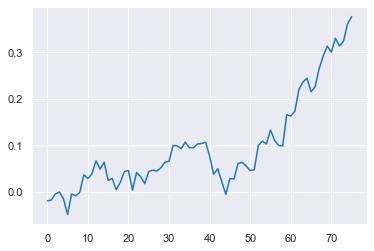

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7)} )
plt.plot(np.array(trade_loop_back.profit_array).cumsum());

### 2.3.3 静态方法，类方法与property属性
#### 1.属性（ property）

回测策略1 总盈亏为：0.8000000000000004%


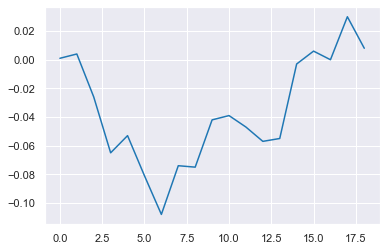

In [45]:
trade_strategy1 = TradeStrategy1()
# 买入阀值从0.07上升到0.1
trade_strategy1.buy_change_threshold = 0.1
trade_loop_back = TradeLoopBack(trade_days, trade_strategy1)
trade_loop_back.execute_trade()
print('回测策略1 总盈亏为：{}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
# 可视化profit_array
plt.plot(np.array(trade_loop_back.profit_array).cumsum());

In [46]:
class TradeStrategy2(TradeStrategyBase):
    """
        交易策略2: 均值回复策略，当股价连续两个交易日下跌，
        且下跌幅度超过阀值默认s_buy_change_threshold(-10%)，
        买入股票并持有s_keep_stock_threshold（10）天
    """
    # 买入后持有天数
    s_keep_stock_threshold = 10
    # 下跌买入阀值
    s_buy_change_threshold = -0.10

    def __init__(self):
        self.keep_stock_day = 0

    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and trade_ind >= 1:
            """
                当没有持有股票的时候self.keep_stock_day == 0 并且
                trade_ind >= 1, 不是交易开始的第一天，因为需要yesterday数据
            """
            # trade_day.change < 0 bool：今天是否股价下跌
            today_down = trade_day.change < 0
            # 昨天是否股价下跌
            yesterday_down = trade_days[trade_ind - 1].change < 0
            # 两天总跌幅
            down_rate = trade_day.change + \
                        trade_days[trade_ind - 1].change
            if today_down and yesterday_down and down_rate < \
                    TradeStrategy2.s_buy_change_threshold:
                # 买入条件成立：连跌两天，跌幅超过s_buy_change_threshold
                self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            # self.keep_stock_day > 0代表持有股票，持有股票天数递增
            self.keep_stock_day += 1

    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= \
                TradeStrategy2.s_keep_stock_threshold:
            # 当持有股票天数超过阀值s_keep_stock_threshold，卖出股票
            self.keep_stock_day = 0

    """
        稍后会详细讲解classmethod，staticmethod
    """

    @classmethod
    def set_keep_stock_threshold(cls, keep_stock_threshold):
        cls.s_keep_stock_threshold = keep_stock_threshold

    @staticmethod
    def set_buy_change_threshold(buy_change_threshold):
        TradeStrategy2.s_buy_change_threshold = buy_change_threshold

回测策略2 总盈亏为：13.299999999999997%


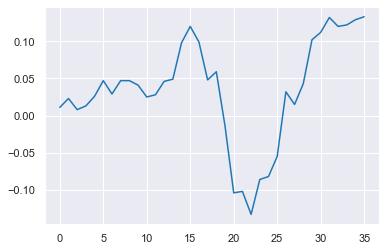

In [47]:
trade_strategy2 = TradeStrategy2()
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
trade_loop_back.execute_trade()
print('回测策略2 总盈亏为：{}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
plt.plot(np.array(trade_loop_back.profit_array).cumsum());

#### 2.静态方法类方法（@ classmethod与@ staticmethod）

回测策略2 总盈亏为：31.900000000000006%


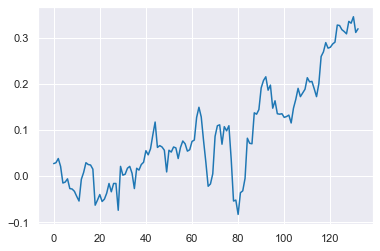

In [48]:
# 实例化一个新的TradeStrategy2类对象
trade_strategy2 = TradeStrategy2()
# 修改为买入后持有股票20天，默认为10天
TradeStrategy2.set_keep_stock_threshold(20)
# 修改股价下跌买入阀值为-0.08（下跌8%），默认为-0.10（下跌10%）
TradeStrategy2.set_buy_change_threshold(-0.08)
# 实例化新的回测对象trade_loop_back
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
# 执行回测
trade_loop_back.execute_trade()
print('回测策略2 总盈亏为：{}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
# 可视化回测结果
plt.plot(np.array(trade_loop_back.profit_array).cumsum());

## 2.4 性能效率
###  2.4.1 itertools的使用

In [50]:
import itertools

1） permutations（）函数，考虑顺序组合元素

In [51]:
items = [1, 2, 3]
for item in itertools.permutations(items):
    print(item)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


2） combinations（）函数，不考虑顺序，不放回数据

In [52]:
for item in itertools.combinations(items, 2):
    print(item)

(1, 2)
(1, 3)
(2, 3)


3） combinations with replacement（）函数，不考虑顺序

In [53]:
for item in itertools.combinations_with_replacement(items, 2):
    print(item)

(1, 1)
(1, 2)
(1, 3)
(2, 2)
(2, 3)
(3, 3)


4） product（）函数，笛卡尔积。

In [54]:
ab = ['a', 'b']
cd = ['c', 'd']

# 针对ab，cd两个集合进行排列组合
for item in itertools.product(ab, cd):
    print(item)

('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')


In [55]:
def calc(keep_stock_threshold, buy_change_threshold):
    """
    :param keep_stock_threshold: 持股天数
    :param buy_change_threshold: 下跌买入阀值
    :return: 盈亏情况，输入的持股天数, 输入的下跌买入阀值
    """
    # 实例化TradeStrategy2
    trade_strategy2 = TradeStrategy2()
    # 通过类方法设置买入后持股天数
    TradeStrategy2.set_keep_stock_threshold(keep_stock_threshold)
    # 通过类方法设置下跌买入阀值
    TradeStrategy2.set_buy_change_threshold(buy_change_threshold)
    # 进行回测
    trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
    trade_loop_back.execute_trade()
    # 计算回测结果的最终盈亏值profit
    profit = 0.0 if len(trade_loop_back.profit_array) == 0 else \
        reduce(lambda a, b: a + b, trade_loop_back.profit_array)
    # 返回值profit和函数的两个输入参数
    return profit, keep_stock_threshold, buy_change_threshold

# 测试，使用上一节使用的参数
calc(20, -0.08)

(0.31900000000000006, 20, -0.08)

In [56]:
# range集合：买入后持股天数从2天－30天，间隔两天
keep_stock_list = list(range(2, 30, 2))
print('持股天数参数组：{}'.format(keep_stock_list))
# 下跌买入阀值从-0.05到-0.15，即从下跌5%到15%
buy_change_list = [buy_change / 100.0 for buy_change in xrange(-5, -16, -1)]
print('下跌阀值参数组：{}'.format(buy_change_list))

持股天数参数组：[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
下跌阀值参数组：[-0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15]


In [58]:
result = []
for keep_stock_threshold, buy_change_threshold in itertools.product(
        keep_stock_list, buy_change_list):
    # 使用calc计算参数对应的最终盈利，结果加入result序列
    result.append(calc(keep_stock_threshold, buy_change_threshold))
print('笛卡尔积参数集合总共结果为：{}个'.format(len(result)))

笛卡尔积参数集合总共结果为：154个


In [59]:
# [::-1]将整个排序结果反转，反转后盈亏收益从最高向低排序
# [:10]取出收益最高的前10个组合查看
sorted(result)[::-1][:10]

[(0.5790000000000001, 28, -0.1),
 (0.519, 26, -0.1),
 (0.5019999999999999, 28, -0.05),
 (0.4770000000000001, 24, -0.1),
 (0.4660000000000001, 22, -0.1),
 (0.45100000000000007, 16, -0.09),
 (0.44999999999999996, 20, -0.06),
 (0.44800000000000006, 28, -0.07),
 (0.437, 28, -0.13),
 (0.437, 28, -0.14)]

##  2.4.2 多进程 vs 多线程

### 1.使用多进程（ ProcessPool Executor）

In [60]:
if abupy.env.g_is_mac_os:
    from concurrent.futures import ProcessPoolExecutor
    # mac下面执行多进程
    result = []

    # 回调函数，通过add_done_callback任务完成后调用
    def when_done(r):
        # when_done在主进程中运行
        result.append(r.result())

    """
        with class_a() as a: 上下文管理器：稍后会具体讲解
    """
    with ProcessPoolExecutor() as pool:
        for keep_stock_threshold, buy_change_threshold in \
                itertools.product(keep_stock_list, buy_change_list):

            """
                submit提交任务：使用calc函数和的参数通过submit提交到独立进程
                提交的任务必须是简单函数，进程并行不支持类方法、闭包等
                函数参数和返回值必须兼容pickle序列化，进程间的通信需要
            """
            future_result = pool.submit(calc, keep_stock_threshold,
                                        buy_change_threshold)
            # 当进程完成任务即calc运行结束后的回调函数
            future_result.add_done_callback(when_done)
    print(sorted(result)[::-1][:10])
else:
    print('在windows系统中使用ipython notebook进行多进程调度有系统bug。\n\
          子进程的结果回不到notebook中的主进程。\n\
          windows用户请使用python文件夹中本章对应的c2.py中的sample_242方法运行本例\n\
          感谢读者\'宪\'提出发现本问题！')

在windows系统中使用ipython notebook进行多进程调度有系统bug。
          子进程的结果回不到notebook中的主进程。
          windows用户请使用python文件夹中本章对应的c2.py中的sample_242方法运行本例
          感谢读者'宪'提出发现本问题！


In [61]:
%run D:\0ilraypan\git_jia\python_abu\python\c2.py

enable example env will only read RomDataBu/csv


持股天数参数组：[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
下跌阀值参数组：[-0.01, -0.02, -0.03, -0.04, -0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15, -0.16, -0.17, -0.18, -0.19, -0.2, -0.21, -0.22, -0.23, -0.24, -0.25, -0.26, -0.27, -0.28, -0.29, -0.3, -0.31, -0.32, -0.33, -0.34, -0.35, -0.36, -0.37, -0.38, -0.39, -0.4, -0.41, -0.42, -0.43, -0.44, -0.45, -0.46, -0.47, -0.48, -0.49, -0.5, -0.51, -0.52, -0.53, -0.54, -0.55, -0.56, -0.57, -0.58, -0.59, -0.6, -0.61, -0.62, -0.63, -0.64, -0.65, -0.66, -0.67, -0.68, -0.69, -0.7, -0.71, -0.72, -0.73, -0.74, -0.75, -0.76, -0.77, -0.78, -0.79, -0.8, -0.81, -0.82, -0.83, -0.84, -0.85, -0.86, -0.87, -0.88, -0.89, -0.9, -0.91, -0.92, -0.93, -0.94, -0.95, -0.96, -0.97, -0.98, -0.99]
Process sorted(result)[::-1][:10]:
 [(0.805, 8, -0.01), (0.5790000000000001, 28, -0.1), (0.519, 26, -0.1), (0.5019999999999999, 28, -0.05), (0.4770000000000001, 24, -0.1), (0.4660000000000001, 22, -0.1), (0.45100000000000007, 16, -0.09), (0.44999

<Figure size 432x288 with 0 Axes>

### 2.使用多线程 Thread PoolExecutor

In [62]:
from concurrent.futures import ThreadPoolExecutor

result = []
def when_done(r):
    result.append(r.result())

with ThreadPoolExecutor(max_workers=8) as pool:
    for keep_stock_threshold, buy_change_threshold in \
            itertools.product(keep_stock_list, buy_change_list):
        future_result = pool.submit(calc, keep_stock_threshold,
                                    buy_change_threshold)
        future_result.add_done_callback(when_done)

In [63]:
sorted(result)[::-1][:10]

[(0.602, 24, -0.12),
 (0.5790000000000001, 28, -0.1),
 (0.5459999999999999, 28, -0.12),
 (0.519, 26, -0.1),
 (0.4770000000000001, 24, -0.1),
 (0.4660000000000001, 22, -0.1),
 (0.45100000000000007, 16, -0.09),
 (0.44999999999999996, 20, -0.06),
 (0.44800000000000006, 28, -0.07),
 (0.437, 28, -0.13)]

##  2.4.3 使用编译库提高性能

In [ ]:
# 买入后持股天数放大寻找范围 1 - 503 天, 间隔1天
keep_stock_list = list(range(1, 504, 1))
# 下跌买入阀值寻找范围 -0.01 - -0.99 共99个
buy_change_list = [buy_change/100.0 for buy_change in xrange(-1, -100, -1)]
def do_single_task():
    task_list = list(itertools.product(keep_stock_list, buy_change_list))
    print('笛卡尔积参数集合总共结果为：{}个'.format(len(task_list)))
    for keep_stock_threshold, buy_change_threshold in task_list:
        calc(keep_stock_threshold, buy_change_threshold)
# %time ipython magic code 详情查阅附录章关于ipython的使用
%time do_single_task()

In [ ]:
import numba as nb
do_single_task_nb = nb.jit(do_single_task)
%time do_single_task_nb()

## 2.5 代码调试

In [ ]:
def gen_buy_change_list():
    buy_change_list = []
    # 下跌买入阀值从-0.05到-0.15，即从下跌5%到15%
    for buy_change in xrange(-5, -16, -1):
        buy_change = buy_change/100
        buy_change_list.append(buy_change)
    return buy_change_list

### 书中本示例针对python3不适用，因为python3默认的除法就是小数

In [ ]:
gen_buy_change_list()

In [ ]:
def gen_buy_change_list():
    buy_change_list = []
    for buy_change in xrange(-5, -16, -1):
        # 1. 原始buy_change
        print(buy_change)
        buy_change = buy_change/100
        # 2. buy_change/100
        print(buy_change)
        buy_change_list.append(buy_change)
    return buy_change_list

In [ ]:
# 2. 导入future库的division`from __future__ import division`
from __future__ import division

def gen_buy_change_list():
    buy_change_list = []
    for buy_change in xrange(-5, -16, -1):
        # 1. 除数或者被除数其中一个是float类型
        buy_change = buy_change/100.0
        buy_change_list.append(buy_change)
    return buy_change_list
gen_buy_change_list()

In [ ]:
import logging

# 设置日志级别为info
logging.basicConfig(level=logging.INFO)


def gen_buy_change_list():
    # 会打印出来，因为info >= level=logging.INFO
    logging.info("gen_buy_change_list begin")

    buy_change_list = []
    for buy_change in xrange(-5, -16, -1):
        # 不会打印出来，debug < level=logging.INFO
        logging.debug(buy_change)
        buy_change = buy_change / 100
        # 不会打印出来，debug < level=logging.INFO
        logging.debug(buy_change)
        buy_change_list.append(buy_change)
    # 会打印出来，因为info >= level=logging.INFO
    logging.info("gen_buy_change_list end")
    return buy_change_list


_ = gen_buy_change_list()

In [ ]:
import pdb


def gen_buy_change_list():
    buy_change_list = []
    for buy_change in xrange(-5, -16, -1):
        # 只针对循环执行到buy_change == -10，中断开始调试
        if buy_change == -10:
            # 打断点，通过set_trace
            pdb.set_trace()

        buy_change = buy_change / 100
        buy_change_list.append(buy_change)
    # 故意向外抛出异常
    raise RuntimeError('debug for pdb')
    return buy_change_list

try:
    _ = gen_buy_change_list()
except Exception as e:
    # 从捕获异常的地方开始调试，经常使用的调试技巧
    pdb.set_trace()

In [ ]:
import win32api,win32con
##提醒OK消息框
win32api.MessageBox(0, "运行完成", "提醒",win32con.MB_ICONWARNING)
